In [98]:
#Grad Course Project: Random Walk
# Taylor Spoo
# Due 12/20/19
# Started: 12/11/19
#imports
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as opt

In [99]:
#First Trial Conditions
shields = np.arange(45,76,1)
MAXwalks=5000
nwalks = np.arange(0,MAXwalks,1)
Nin = []
Ncap = []
Nout =[]

for shield in shields:
    #tally of where the nuetron is
    num_in = 0
    num_cap = 0
    num_out = 0    
    for n in nwalks:
        E = 100
        #initalize lists
        y_pos = []
        x_pos = []
        #start at the origin
        x=0
        y=0
        x_pos.append(x)
        y_pos.append(y)

        #the first step
        step1 = np.random.randint(0,4)
        if step1==0: #left
            x+= -1
            y+=0
            x_pos.append(x)
            y_pos.append(y)
        elif step1==1: #right
            x+=1
            y+=0
            x_pos.append(x)
            y_pos.append(y)
        elif step1==2: #up
            x+=0
            y+=1
            x_pos.append(x)
            y_pos.append(y)
        else: #down
            x+=0
            y+= -1
            x_pos.append(x)
            y_pos.append(y)

        #random walking
        while E>0:
            RW = np.random.randint(0,5)
            if RW==0:
                #up
                y+=1
                x_pos.append(x)
                y_pos.append(y)
            elif RW==1:
                #down
                y-=1
                x_pos.append(x)
                y_pos.append(y)
            else:
                #right
                x+=1
                if x>shield:
                    num_out+=1
                    break
                else:
                    x_pos.append(x)
                    y_pos.append(y)
            E-=1

        if x_pos[-1]<0: num_in+=1
        elif x_pos[-1]>0 and x_pos[-1]<shield: num_cap+=1
        #else: num_out+=1
    Nin.append(num_in)
    Ncap.append(num_cap)
    Nout.append(num_out)
#print(num_out,num_cap,num_in)
P_out = np.array(Nout)/MAXwalks
Ln_P = np.log(np.array(P_out))

In [100]:
#curve fitting to find a
def gaus(x,a,b,c,d):
    return a*np.exp(-(x-b)**2/c) + d

def linear(x,m,b):
    return m*x+b

def poly2(x,a,b,c):
    return a*(x**2)+b*x+c

def log(x,a,b,c,d):
    return a*np.log(b*x + c) + d

a= 1.0705102895693892 +/- 0.017290559769263292


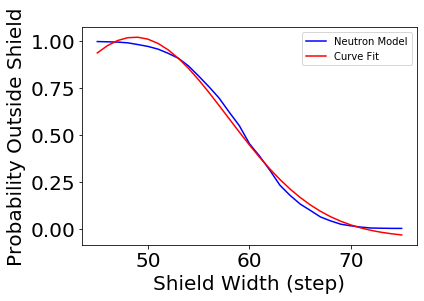

In [101]:
guess =[100,50,1, 0]
popt,pcov = opt.curve_fit(gaus, shields, P_out, guess)
punc = np.sqrt(np.diag(pcov))
#print(*popt)
#print(*punc)
print("a=", popt[0], "+/-", punc[0])

#plotting
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(shields, P_out, c="b", label="Neutron Model")
ax.plot(shields, gaus(shields,*popt), c='r', label="Curve Fit")
ax.set_xlabel("Shield Width (step)", size=20)
ax.set_ylabel("Probability Outside Shield", size=20)
ax.xaxis.set_tick_params(labelsize=20)
ax.yaxis.set_tick_params(labelsize=20)
#ax.grid()
ax.legend()
plt.show()

a= -0.011768511184383998 +/- 0.0004631002847077765


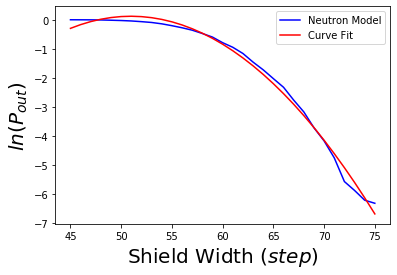

In [102]:
popt2,pcov2 = opt.curve_fit(poly2,shields,Ln_P)
punc2 = np.sqrt(np.diag(pcov2))
#print(*popt2)
#print(*punc2)

print("a=", popt2[0], "+/-", punc2[0])

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(shields, Ln_P, c="b", label="Neutron Model")
ax.plot(shields, poly2(shields,*popt2), c='r', label="Curve Fit")
ax.set_xlabel("Shield Width $(step)$", size=20)
ax.set_ylabel("$ln(P_{out}$)", size=20)
ax.legend()
plt.show()

In [103]:
#Second Trial Conditions
std = 20 #steps

shields = np.arange(45,76,1)
MAXwalks=5000
nwalks = np.arange(0,MAXwalks,1)
Nin = []
Ncap = []
Nout =[]

for shield in shields:
    #tally of where the nuetron is
    num_in = 0
    num_cap = 0
    num_out = 0    
    for n in nwalks:
        m=np.random.rand()
        noise = (-2*(std**2)*np.log(1-m))**(1/2)
        E = 100+noise
        #initalize lists
        y_pos = []
        x_pos = []
        #start at the origin
        x=0
        y=0
        x_pos.append(x)
        y_pos.append(y)

        #the first step
        step1 = np.random.randint(0,4)
        if step1==0: #left
            x+= -1
            y+=0
            x_pos.append(x)
            y_pos.append(y)
        elif step1==1: #right
            x+=1
            y+=0
            x_pos.append(x)
            y_pos.append(y)
        elif step1==2: #up
            x+=0
            y+=1
            x_pos.append(x)
            y_pos.append(y)
        else: #down
            x+=0
            y+= -1
            x_pos.append(x)
            y_pos.append(y)

        #random walking
        while E>0:
            RW = np.random.randint(0,5)
            if RW==0:
                #up
                y+=1
                x_pos.append(x)
                y_pos.append(y)
            elif RW==1:
                #down
                y-=1
                x_pos.append(x)
                y_pos.append(y)
            else:
                #right
                x+=1
                if x>shield:
                    num_out+=1
                    break
                else:
                    x_pos.append(x)
                    y_pos.append(y)
            E-=1

        if x_pos[-1]<0: num_in+=1
        elif x_pos[-1]>0 and x_pos[-1]<shield: num_cap+=1
        #else: num_out+=1
    Nin.append(num_in)
    Ncap.append(num_cap)
    Nout.append(num_out)
#print(num_out,num_cap,num_in)
P_out = np.array(Nout)/MAXwalks
Ln_P = np.log(np.array(P_out))

a= 3615.591531281232 +/- 276151.46653863136


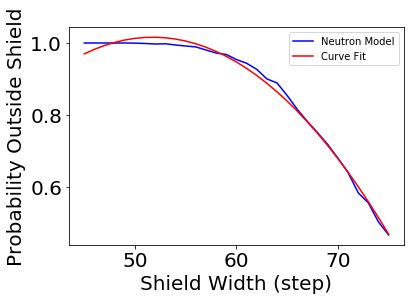

In [104]:
guess =[.0005,50,1, 0]
popt3,pcov3 = opt.curve_fit(gaus, shields, P_out, guess)
punc3 = np.sqrt(np.diag(pcov3))
#print(*popt)
#print(*punc)
print("a=", popt3[0], "+/-", punc3[0])

#plotting
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(shields, P_out, c="b", label="Neutron Model")
ax.plot(shields, gaus(shields,*popt3), c='r', label="Curve Fit")
ax.set_xlabel("Shield Width (step)", size=20)
ax.set_ylabel("Probability Outside Shield", size=20)
ax.xaxis.set_tick_params(labelsize=20)
ax.yaxis.set_tick_params(labelsize=20)
#ax.grid()
ax.legend()
plt.show()

a= -0.0014993672590399392 +/- 7.664910874013752e-05


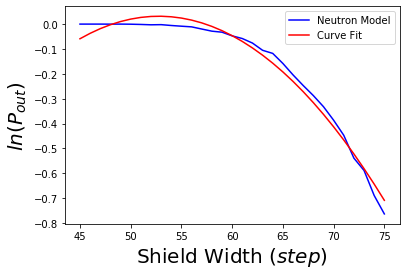

In [105]:
popt4,pcov4 = opt.curve_fit(poly2,shields,Ln_P)
punc4 = np.sqrt(np.diag(pcov4))
#print(*popt2)
#print(*punc2)

print("a=", popt4[0], "+/-", punc4[0])

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(shields, Ln_P, c="b", label="Neutron Model")
ax.plot(shields, poly2(shields,*popt4), c='r', label="Curve Fit")
ax.set_xlabel("Shield Width $(step)$", size=20)
ax.set_ylabel("$ln(P_{out}$)", size=20)
ax.legend()
plt.show()

# Effects of value $a$ and its uncertianty

I used two different methods to find $a$. One way I made a plot of probability of getting out versus shield width and the other way I made a plot of natural log of probability of getting out versus shield width.

Method one: 
I curve fitted a gaussian curve and found a value for $a$ with intial energy for 100 steps. Then when I changed the intial energy to a normal distribution, with a mean value of 100 steps and 20 step standard deviation, my gaussian curve fit calculated a different value of $a$. The fits visually look about the same, but have different $a$-values. In the normal distribution energy case, the uncertianity actually got worse.

Method two:
I curve fitted a second degree polynomial curve and found a value for $a$ with intial energy for 100 steps. Then when I changed the intial energy to a normal distribution, with a mean value of 100 steps and 20 step standard deviation, my gaussian curve fit calculated a different value of $a$. The fits visually look about the same but have different a-values. With the normal distribution energy the uncertianity actually got better.

(see all values below)

In [108]:
print("Method 1:")
print("Initial E for 100 steps:","a=", popt[0], "$\pm$", punc[0])
print("Normal Distribution:","a=", popt3[0], "$\pm$", punc3[0])
print()
print("Method 2:")
print("Initial E for 100 steps:","a=", popt2[0], "$\pm$", punc2[0])
print("Normal Distribution:","a=", popt4[0], "$\pm$", punc4[0])

Method 1:
Initial E for 100 steps: a= 1.0705102895693892 $\pm$ 0.017290559769263292
Normal Distribution: a= 3615.591531281232 $\pm$ 276151.46653863136

Method 2:
Initial E for 100 steps: a= -0.011768511184383998 $\pm$ 0.0004631002847077765
Normal Distribution: a= -0.0014993672590399392 $\pm$ 7.664910874013752e-05
